<a href="https://colab.research.google.com/github/YoonSuYeon/ComputerVision/blob/main/Week1_day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **텐서 구조**

In [ ]:
import pandas as pd

In [6]:
# 4D 이미지 텐서 (배치 크기, 높이, 너비, 채널)
image_tensor = np.random.rand(32, 128, 128, 3)  # 32장의 RGB 이미지 (128x128)

In [7]:
# 3D 시계열 데이터 텐서 (배치 크기, 시간 단계, 특성 수)
time_series_tensor = np.random.rand(64, 10, 100)  # 64개의 데이터, 10개의 시간 단계, 각 100차원 특징

## 1. 단일 RGB 이미지 데이터를 CNN 입력 형식(4D 텐서)으로 변환

In [30]:
import cv2
import numpy as np

# 이미지 로드 (OpenCV는 기본적으로 BGR 형식)
image = cv2.imread("/content/data/고양이사진/cat.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # RGB 형식으로 변환

# CNN 입력 텐서로 변환 (배치 크기 추가)
image_tensor = np.expand_dims(image, axis=0)  # (1, height, width, channels)

print("텐서의 모양:", image_tensor.shape)  # (1, H, W, 3)


텐서의 모양: (1, 183, 275, 3)


## 3. CNN 합성곱 연산을 위한 필터 생성 (4D 텐서)

In [34]:
# 3x3 커널, 입력 채널 3 (RGB), 출력 채널 8
conv_filters = np.random.rand(3, 3, 3, 8)

print("텐서의 모양:", conv_filters.shape)  # (3, 3, 3, 8)


텐서의 모양: (3, 3, 3, 8)


## 4. CNN을 활용한 영상(비디오) 데이터 처리 (5D 텐서)

In [33]:
import cv2

# 비디오 캡처 (b.mp4 사용)
cap = cv2.VideoCapture("/content/b.mp4")

frames = []
frame_count = 10  # 10개의 프레임만 저장
while len(frames) < frame_count:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # RGB 변환
    frame = cv2.resize(frame, (64, 64))  # CNN 입력을 위해 크기 조정
    frames.append(frame)

cap.release()

# 5D 텐서로 변환
video_tensor = np.expand_dims(np.array(frames), axis=0)  # 배치 크기 추가

print("텐서의 모양:", video_tensor.shape)  # (1, 10, 64, 64, 3)


텐서의 모양: (1, 10, 64, 64, 3)


# **텐서의 조작**

## 1. 단일 이미지 로드 후 고차원 텐서 변형 (차원 변경, 전치, 확장)

In [29]:
import cv2
import numpy as np

# 이미지 로드
image = cv2.imread("/content/data/고양이사진/cat.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # RGB 변환
image = cv2.resize(image, (224, 224))  # 크기 조정

# CNN 입력을 위해 차원 추가 (4D 텐서 변환)
image_tensor = np.expand_dims(image, axis=0)  # (1, 224, 224, 3)

print("원본 텐서 모양:", image_tensor.shape)  # (1, 224, 224, 3)

# 차원 변형 (Transpose) - CNN에서 채널을 앞에 배치하는 경우
image_tensor_transposed = np.transpose(image_tensor, (0, 3, 1, 2))  # (1, 3, 224, 224)

print("전치 후 텐서 모양:", image_tensor_transposed.shape)  # (1, 3, 224, 224)

# 차원 축소 (Squeeze) - 불필요한 배치 차원 제거
image_squeezed = np.squeeze(image_tensor, axis=0)  # (224, 224, 3)

print("Squeeze 후 텐서 모양:", image_squeezed.shape)  # (224, 224, 3)


원본 텐서 모양: (1, 224, 224, 3)
전치 후 텐서 모양: (1, 3, 224, 224)
Squeeze 후 텐서 모양: (224, 224, 3)


## 2. 다중 이미지 로드 후 고차원 텐서 조작

In [32]:
import glob

# 다중 이미지 로드
image_files = glob.glob("/content/data/*.jpeg")
batch_images = []

for file in image_files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    batch_images.append(img)

# 리스트를 NumPy 배열로 변환 (4D 텐서)
batch_images_tensor = np.array(batch_images)  # (batch_size, 128, 128, 3)
print("배치 이미지 텐서 모양:", batch_images_tensor.shape)

# 차원 확장 (채널 개수 증가 - 예: Grayscale에서 RGB 변환 시 사용)
expanded_tensor = np.expand_dims(batch_images_tensor, axis=-1)  # (batch_size, 128, 128, 3, 1)
print("확장 후 텐서 모양:", expanded_tensor.shape)

# 채널을 맨 앞으로 이동 (Transpose)
batch_images_transposed = np.transpose(batch_images_tensor, (0, 3, 1, 2))  # (batch_size, 3, 128, 128)
print("전치 후 텐서 모양:", batch_images_transposed.shape)


배치 이미지 텐서 모양: (0,)
확장 후 텐서 모양: (0, 1)


ValueError: axes don't match array

b.mp4 업로드하기!!

## 3. 동영상 로드 후 CNN 입력 형식으로 변환 및 조작

In [24]:
import cv2

# 비디오 로드
cap = cv2.VideoCapture("b.mp4")

frames = []
frame_count = 16  # CNN 입력을 위해 16프레임 사용

while len(frames) < frame_count:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # RGB 변환
    frame = cv2.resize(frame, (64, 64))  # 크기 조정
    frames.append(frame)

cap.release()

# 5D 텐서 변환 (배치 크기 1 추가)
video_tensor = np.expand_dims(np.array(frames), axis=0)  # (1, 16, 64, 64, 3)
print("비디오 텐서 모양:", video_tensor.shape)

# 차원 변환 - 채널을 앞쪽으로 이동 (N, T, C, H, W) 형태
video_tensor_transposed = np.transpose(video_tensor, (0, 1, 4, 2, 3))  # (1, 16, 3, 64, 64)
print("전치 후 비디오 텐서 모양:", video_tensor_transposed.shape)

# 특정 프레임 선택 (예: 첫 번째 프레임)
first_frame = video_tensor[:, 0, :, :, :]
print("첫 번째 프레임 모양:", first_frame.shape)  # (1, 64, 64, 3) # 픽셀 수, 채널값


비디오 텐서 모양: (1, 16, 64, 64, 3)
전치 후 비디오 텐서 모양: (1, 16, 3, 64, 64)
첫 번째 프레임 모양: (1, 64, 64, 3)


## 4. 합성곱 필터와 CNN 입력 데이터 간의 연산

In [3]:
import numpy as np
import tensorflow as tf

# CNN 입력 데이터 (단일 이미지, 3채널, 128x128 크기)
# 랜덤 이미지생성
input_image = np.random.rand(1, 128, 128, 3).astype(np.float32)

# CNN 필터 (3x3, 입력 채널 3, 출력 채널 16)
conv_filter = np.random.rand(3, 3, 3, 16).astype(np.float32) # 입력데이터 커널

# TensorFlow를 사용한 합성곱 연산 수행
input_tensor = tf.constant(input_image)
filter_tensor = tf.constant(conv_filter)

# 합성곱 연산 (stride=1, padding='SAME')
conv_output = tf.nn.conv2d(input_tensor, filter_tensor, strides=[1, 1, 1, 1], padding='SAME')

print("합성곱 연산 후 출력 텐서 모양:", conv_output.shape)


합성곱 연산 후 출력 텐서 모양: (1, 128, 128, 16)


## 예제 1: 동영상에서 프레임 추출 및 CNN 입력 변환 (5D 텐서)

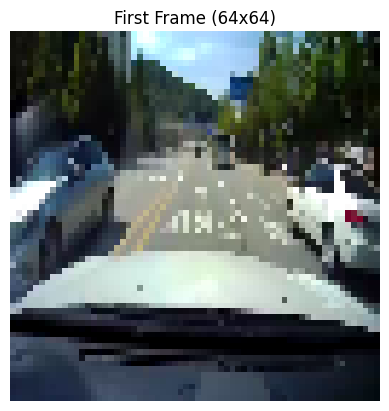

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 비디오 파일 로드
cap = cv2.VideoCapture("/content/b.mp4")

frames = []
frame_count = 16  # CNN 모델을 위한 16개의 연속된 프레임을 저장

while len(frames) < frame_count:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # RGB 변환
    frame = cv2.resize(frame, (64, 64))  # CNN 입력을 위해 크기 조정
    frames.append(frame)

cap.release()

# CNN 입력을 위한 5D 텐서 변환 (배치 크기 추가)
video_tensor = np.expand_dims(np.array(frames), axis=0)  # (1, 16, 64, 64, 3) # 16프레임 64X64, rgb3

# 첫 번째 프레임 시각화
plt.imshow(video_tensor[0, 0])
plt.title("First Frame (64x64)")
plt.axis("off")
plt.show()


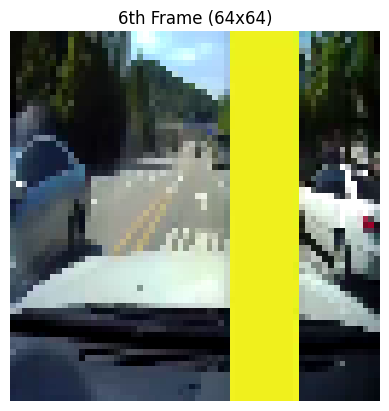

In [22]:
# 위 코드를 수정해서 텐서형태로 변환된 첫번째 배치 이미지 프레임 중 6번째 프레임 이미지를 시각화 하도록 코드를 수정해 보세요.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 비디오 파일 로드
cap = cv2.VideoCapture("/content/b.mp4")

frames = []
frame_count = 16  # CNN 모델을 위한 16개의 연속된 프레임을 저장

while len(frames) < frame_count:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # RGB 변환
    frame = cv2.resize(frame, (64, 64))  # CNN 입력을 위해 크기 조정
    frames.append(frame)

cap.release()

# CNN 입력을 위한 5D 텐서 변환 (배치 크기 추가)
video_tensor = np.expand_dims(np.array(frames), axis=0)  # (1, 16, 64, 64, 3)

# 6 번째 프레임 시각화
plt.imshow(video_tensor[0, 5])
plt.title("6th Frame (64x64)")
plt.axis("off")
plt.show()


## 예제 2: 동영상 텐서 조작 - 특정 프레임 선택 및 변형

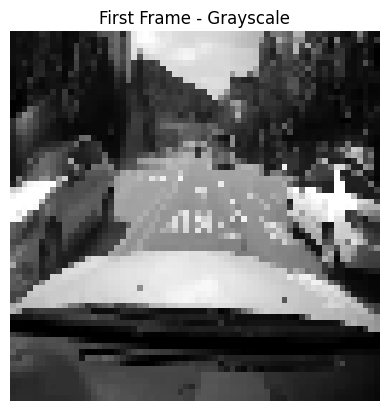

In [23]:
# 특정 프레임 선택 (예: 첫 번째 프레임)
first_frame = video_tensor[:, 0, :, :, :]  # (1, 64, 64, 3)

# 모든 프레임을 흑백으로 변환 (채널 축소)
gray_video_tensor = np.mean(video_tensor, axis=-1, keepdims=True)  # (1, 16, 64, 64, 1) # 높이, 가로, 세로
# mean : RGB 채널 전체를 평균내기, keepdims : 차원을 유지

# 흑백 첫 번째 프레임 시각화
plt.imshow(gray_video_tensor[0, 0, :, :, 0], cmap='gray')
plt.title("First Frame - Grayscale")
plt.axis("off")
plt.show()


## 예제 3: CNN 모델에서 사용될 영상 데이터 증강 (Data Augmentation)

증강 후 비디오 텐서 모양: (1, 16, 64, 64, 3)


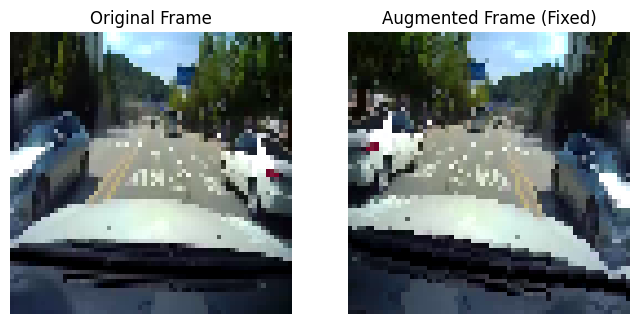

In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

###
# 정규화: OpenCV는 0~255, TensorFlow 변환 과정에서 0~1로 변환
def normalize_image(image):
    return image / 255.0  # 0~1 범위로 정규화 (최대값=255로 나누기)

# 데이터 증강 함수 (픽셀 범위 유지)
def augment_frame(frame):
    frame = normalize_image(frame)  # 정규화 적용
    data_augmentation = tf.keras.Sequential([
        tf.keras.layers.RandomFlip("horizontal"),  # 좌우 반전(Random이기에 때마다 다름)
        tf.keras.layers.RandomRotation(0.1, interpolation='nearest')  # 10% 회전, 보간법 변경
    ])
    augmented = data_augmentation(tf.expand_dims(frame, axis=0))[0]  # 배치 차원 제거
    # tf는 batch, h, w, channel로 입력받아야 함.
    return np.clip(augmented * 255, 0, 255).astype(np.uint8)  # 다시 0~255로 변환
### 자세히 보기!!

# 동영상 텐서에서 프레임별로 데이터 증강 적용
augmented_frames = [augment_frame(video_tensor[0, i]) for i in range(video_tensor.shape[1])]

# 다시 5D 텐서로 변환
augmented_video_tensor = np.expand_dims(np.stack(augmented_frames, axis=0), axis=0)  # (1, 16, 64, 64, 3)

print("증강 후 비디오 텐서 모양:", augmented_video_tensor.shape)  # (1, 16, 64, 64, 3)

# 원본 vs 증강된 첫 번째 프레임 비교 시각화
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(video_tensor[0, 0].astype(np.uint8))
axes[0].set_title("Original Frame")
axes[0].axis("off")

axes[1].imshow(augmented_video_tensor[0, 0])
axes[1].set_title("Augmented Frame (Fixed)")
axes[1].axis("off")

plt.show()


## 예제 4: CNN 필터를 사용한 동영상 합성곱 처리

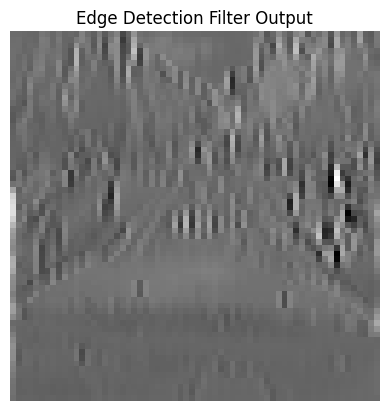

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# CNN 입력 데이터 (비디오에서 첫 번째 프레임 사용)
input_frame = tf.constant(video_tensor[:, 0, :, :, :], dtype=tf.float32)  # (1, 64, 64, 3)

# CNN 엣지 검출 필터 생성 (3x3, 입력 채널 3, 출력 채널 1)# 컨볼루션 연산 사용
edge_filter = np.array([
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],  # R 채널
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],  # G 채널
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]   # B 채널
], dtype=np.float32)

# 필터 차원을 (3,3,3,1)로 변환 (높이, 너비, 입력 채널 수, 출력 채널 수)
conv_filter = edge_filter.reshape(3, 3, 3, 1)

# 텐서로 변환
conv_filter = tf.constant(conv_filter, dtype=tf.float32)

# 합성곱 연산 수행
conv_output = tf.nn.conv2d(input_frame, conv_filter, strides=[1, 1, 1, 1], padding='SAME')

# 결과를 NumPy 배열로 변환 후 첫 번째 프레임 시각화
plt.imshow(conv_output.numpy()[0, :, :, 0], cmap='gray')
plt.title("Edge Detection Filter Output")
plt.axis("off")
plt.show()


## 예제 5: 비디오 데이터를 시계열 LSTM 모델 입력으로 변환

LSTM 입력용 비디오 텐서 모양: (1, 16, 12288)


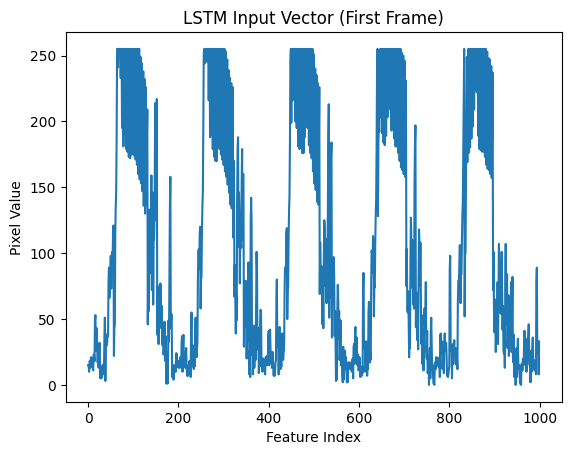

In [27]:
# 비디오 데이터를 (배치 크기, 프레임 수, 특성 수) 형태로 변환
video_lstm_tensor = video_tensor.reshape(1, frame_count, -1)  # (1, 16, 64*64*3)

print("LSTM 입력용 비디오 텐서 모양:", video_lstm_tensor.shape)  # (1, 16, 12288)

# 첫 번째 프레임을 벡터로 변환하여 시각화
plt.plot(video_lstm_tensor[0, 0, :1000])  # 첫 번째 프레임의 일부 데이터 (1000개 요소)
plt.title("LSTM Input Vector (First Frame)")
plt.xlabel("Feature Index")
plt.ylabel("Pixel Value")
plt.show()
